# Import Statements

In [1]:
import src.HCAT as HCAT
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Directories for importing/exporting images and defining (optional) image outline masks
mask_dir = 'Implant Outlines/'
image_dir = 'Input Images/'
export_dir = 'Output Images/'

# Kowalski, Analysis!

`HCAT` is initialized by simply specifying the directory containing the images to be analyzed (`image_dir`), the directory where processed images should be exported (`export_dir`), and the (optional) directory containing XY points outlining an exclusion mask (`mask_dir`).

To run the analysis, provide the kernel size in pixels (**must be odd**) and provide the number of clusters for separation of implant and tissue during the second K-Means clustering step and call the `kowalski` function on the initialized `HCAT` object.

**Example One:** <br>
Analyze image(s) with no exclusion zone. Note that not excluding the background biases the clustering and makes it more difficult to separate empty space from tissue in the area of interest.

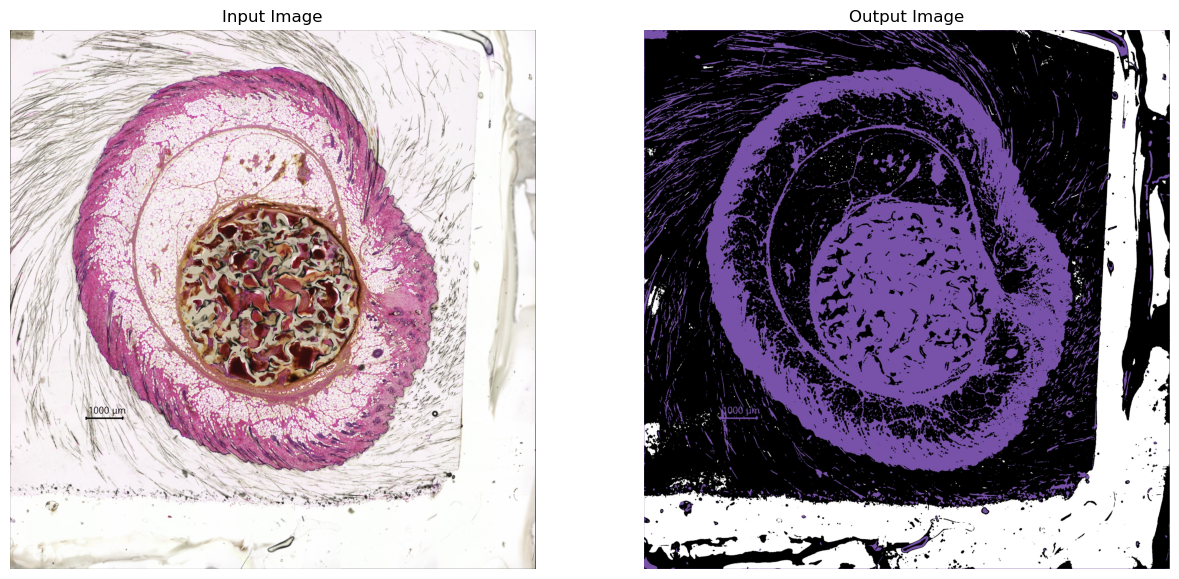

In [3]:
#Run Analysis
unmasked_CAT = HCAT.Histology_CAT(image_dir, export_dir)
unmasked_CAT.kowalski(krnl_sz = 5, K_cluster = 4)

'''
Plotting
'''
input_image = np.asarray(Image.open('Input Images/4109_flap.jpg'))
output_image = np.asarray(Image.open('Output Images/Analyzed 4109_flap.jpg'))

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,7))
fig.figsize = (15,7)

#Input Image
ax1.axis('off')
ax1.set_title("Input Image")
ax1.imshow(input_image)

#Output Image
ax2.axis('off')
ax2.set_title("Output Image")
ax2.imshow(output_image) 
plt.show()

**Example Two:** <br> 
Analyze image with exclusion zone. Note that by removing the background, the clustering is able to pick up on the empty space in the region of interest.

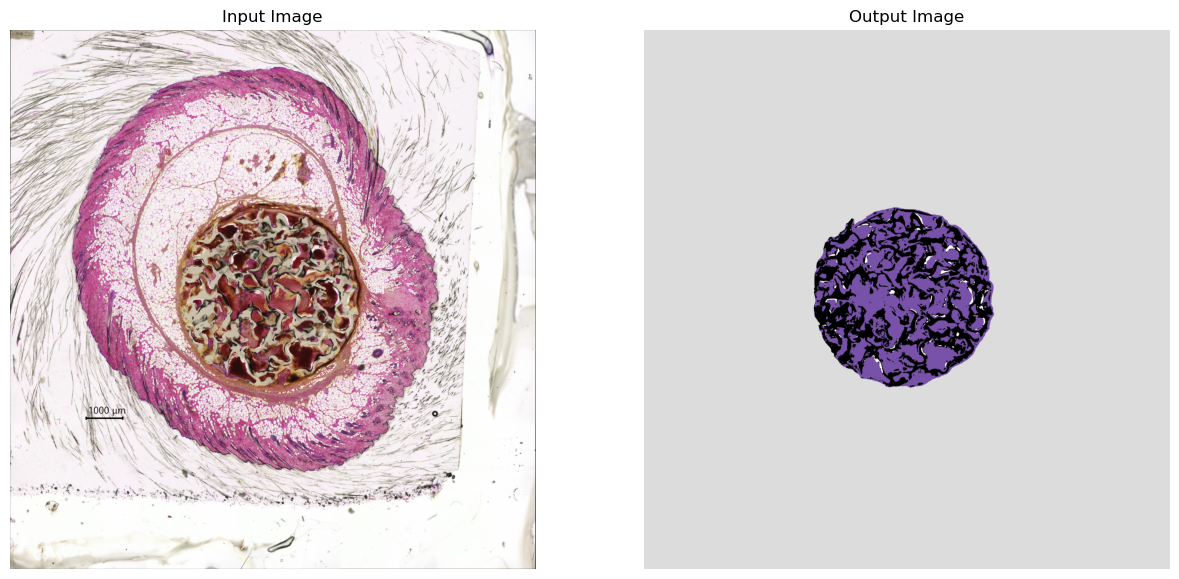

In [4]:
#Run analysis
masked_CAT = HCAT.Histology_CAT(image_dir, export_dir, mask_dir)
masked_CAT.kowalski(krnl_sz = 5, K_cluster = 4)

'''
Plotting
'''
input_image = np.asarray(Image.open('Input Images/4109_flap.jpg'))
output_image = np.asarray(Image.open('Output Images/Analyzed 4109_flap.jpg'))

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,7))
fig.figsize = (15,7)

#Input Image
ax1.axis('off')
ax1.set_title("Input Image")
ax1.imshow(input_image)

#Output Image
ax2.axis('off')
ax2.set_title("Output Image")
ax2.imshow(output_image) 
plt.show()